In [463]:
import numpy as np
import pandas as pd
import plotly.express as px

In [464]:
# Load the CSV file, without skipping any rows initially
file_path = "/Users/javanmardi/Work/IGSB/Bone2Gene_Survey_Study/3_progressive_results/B2G Survey_7_14_2024.csv"
initial_df = pd.read_csv(file_path, sep=';', header=None)

In [465]:
# Set the first row as the header of the dataframe
headers = initial_df.iloc[0]
questions = initial_df.iloc[1]
header_question_dict = dict(zip(headers, questions))

In [466]:
# Now, read the CSV again, this time skipping the first three rows and setting the first row as header
data_df = pd.read_csv(file_path, sep=';', skiprows=[1, 2])

# Show the first few rows of the dataframe to verify
# print("\nData Preview:")
data_df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q29,Q30,Q26,Q31,Q32,Q33,Q34,Q35,Q36,Q39
0,03.03.24 08:54,03.03.24 08:59,IP Address,91.21.244.172,49.0,255.0,False,10.03.24 09:59,R_GsjgGtb1iWqA3lY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20.03.24 23:39,20.03.24 23:51,IP Address,149.171.5.177,100.0,707.0,True,20.03.24 23:51,R_G1NYUbKm3zBogud,NaN,...,NaN,NaN,LLMs for more efficient knowledge retrieval fr...,Yes,"Data privacy and security,Compliance with medi...",NaN,Very concerned,Very important,explainability is less of an issue if diagnosi...,andreas.zankl@sydney.edu.au
2,25.03.24 10:51,25.03.24 11:03,IP Address,193.2.253.126,100.0,682.0,True,25.03.24 11:03,R_GfP4WslsdJbXYqA,NaN,...,NaN,NaN,Combining imaging to genetic results interpret...,Yes,Interpretability of AI algorithms,NaN,Somewhat concerned,Very important,/,primoz.kotnik@mf.uni-lj.si
3,26.03.24 09:42,26.03.24 10:14,IP Address,195.113.82.2,100.0,1882.0,True,26.03.24 10:14,R_GWvmaj6KebYNzQ5,NaN,...,NaN,NaN,maybe growth curve assessment,Yes,"Data privacy and security,Compliance with medi...",NaN,"Unsure, need to see research results first.",Slightly important,NaN,NaN
4,27.03.24 11:44,27.03.24 12:04,IP Address,193.206.71.4,100.0,1201.0,True,27.03.24 12:04,R_Gj06bhZ91wFXgsT,NaN,...,NaN,NaN,It could be used to improve the analysis of ge...,Yes,Informed consent for AI-based diagnostics,NaN,Not very concerned,Very important,NaN,NaN


In [467]:
#the finished surveys

finished_df=data_df[data_df['Finished']==True]
finished_df.shape

(93, 54)

In [468]:
# Identify empty columns
empty_columns = finished_df.isna().all()

# Drop empty columns
data = finished_df.drop(columns=empty_columns[empty_columns].index)

***
# Participants Info

In [469]:
header_question_dict['Q2']

'Are you involved in caring for or in the diagnostic process of patients with known or possible rare bone diseases (or conditions where skeletal anomalies and related findings are an important feature)?'

In [470]:
# fig = px.histogram(data, x='Q2')
# fig.show()

In [471]:
# Calculate frequency of values in the column
Q2_value_counts = data['Q2'].value_counts().reset_index()
Q2_value_counts.columns = ['Value', 'Count']

In [472]:
print(Q2_value_counts['Value'].to_string())

0    I am involved with both: diagnostic process an...
1             I am involved in the diagnostic process.
2    I am involved in the pre- and/or post-diagnosi...
3    I am NOT involved in diagnostic process or pre...


In [473]:
import re # the regular expression module

# Define the dictionary with current and desired texts
replacement_dict = {
    r'I am involved with both*': 'Both',
    r'I am involved in the diagnostic process.': 'The diagnostic process',
    r'I am involved in the pre-*': 'Pre- and post-diagnosis care',
    r'I am NOT involved in*': 'None'
}

# Function to replace text using regular expressions
def replace_text(value, replacement_dict):
    for pattern, new_text in replacement_dict.items():
        if re.match(pattern, value):
            return new_text
    return value

# Apply the function to the DataFrame
Q2_value_counts['Value'] = Q2_value_counts['Value'].apply(lambda x: replace_text(x, replacement_dict))

# Display the updated DataFrame
print(Q2_value_counts)

                          Value  Count
0                          Both     60
1        The diagnostic process     22
2  Pre- and post-diagnosis care      6
3                          None      5


In [474]:
# fig = px.bar(Q2_value_counts, x="Count", y="Value", orientation='h')
# fig.show()

***

In [475]:
header_question_dict['Q10']

'How many years of experience do you have in the healthcare field?'

In [476]:
# Calculate frequency of values in the Q10 column
Q10_value_counts = data['Q10'].value_counts().reset_index()
Q10_value_counts.columns = ['Value', 'Count']

***

In [477]:
header_question_dict['Q4']

'What is your primary role in or related to healthcare?'

In [478]:
# Calculate frequency of values in the Q4 column
Q4_value_counts = data['Q4'].value_counts().reset_index()
Q4_value_counts.columns = ['Value', 'Count']

In [479]:
Q4_value_counts

,Value,Count
0,Physician,82
1,Genetic Counselor,6
2,Researcher (but not a formal clinician),3
3,Nurse,1
4,Physician Assistant or Nurse Practitioner,1


***

In [480]:
header_question_dict['Q11']

'Which type of healthcare facility best describes where you primarily work (i.e., where do you work most often)?'

In [481]:
# Calculate frequency of values in the Q20 column
Q11_value_counts = data['Q11'].value_counts().reset_index()
Q11_value_counts.columns = ['Value', 'Count']

In [482]:
Q11_value_counts

,Value,Count
0,Academic medical center,75
1,Community hospital or clinic,8
2,Research institution,4
3,Private practice,2
4,Other (Please specify),2
5,Government medical center,2


In [483]:
# Define the dictionary with current and desired texts
replacement_dict = {
    r'Other*': 'Other'
}

# Function to replace text using regular expressions
def replace_text(value, replacement_dict):
    for pattern, new_text in replacement_dict.items():
        if re.match(pattern, value):
            return new_text
    return value

# Apply the function to the DataFrame
Q11_value_counts['Value'] = Q11_value_counts['Value'].apply(lambda x: replace_text(x, replacement_dict))

# Display the updated DataFrame
print(Q11_value_counts)

                          Value  Count
0       Academic medical center     75
1  Community hospital or clinic      8
2          Research institution      4
3              Private practice      2
4                         Other      2
5     Government medical center      2


***

***

# Single plots

In [484]:
import plotly.graph_objects as go

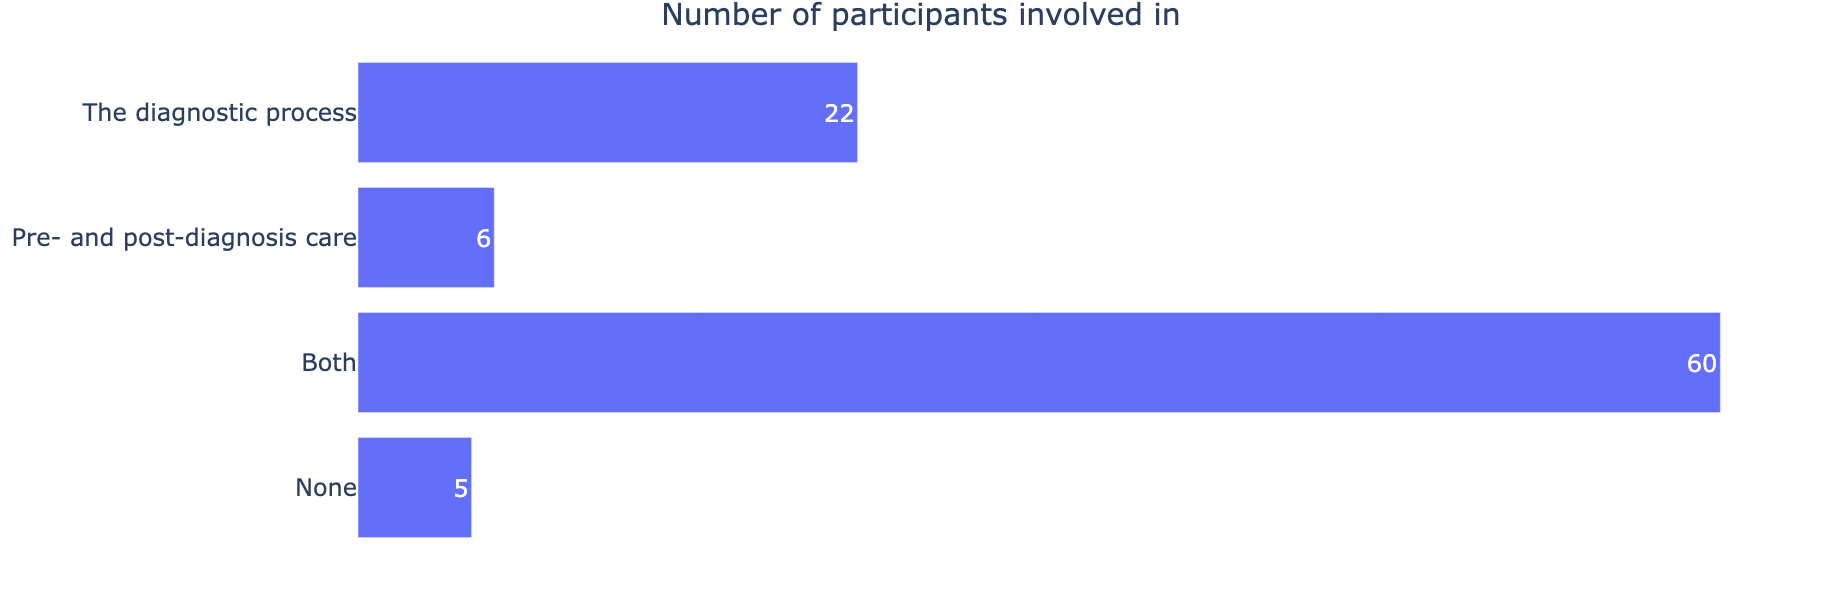

In [485]:
fig = go.Figure(
    go.Bar(x=Q2_value_counts['Count'], y=Q2_value_counts['Value'], orientation='h', showlegend=False, 
           text=Q2_value_counts['Count'], textposition='auto', textfont=dict(size=24))

)

bar_chart_1_order = ['None', 'Both','Pre- and post-diagnosis care','The diagnostic process']
fig.update_yaxes(categoryorder='array', categoryarray=bar_chart_1_order)


fig.update_xaxes(showgrid=True, zeroline=True, showline=True, linewidth=1, linecolor='black', mirror=False, tickfont=dict(size=24), visible=False)
fig.update_yaxes(showgrid=True, zeroline=True, showline=False, linewidth=1, linecolor='black', mirror=False, tickfont=dict(size=24))

fig.update_layout(
    width=800,   # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    title_text="Number of participants involved in",  # Add a title to the figure
    title_x=0.5,  # Center the title horizontally
    title_font=dict(size=30),
    margin=dict(t=50, l=50, r=50, b=50)
)

fig.show()
fig.write_image("Participants_involvement.png", width=800, height=600, scale=6)

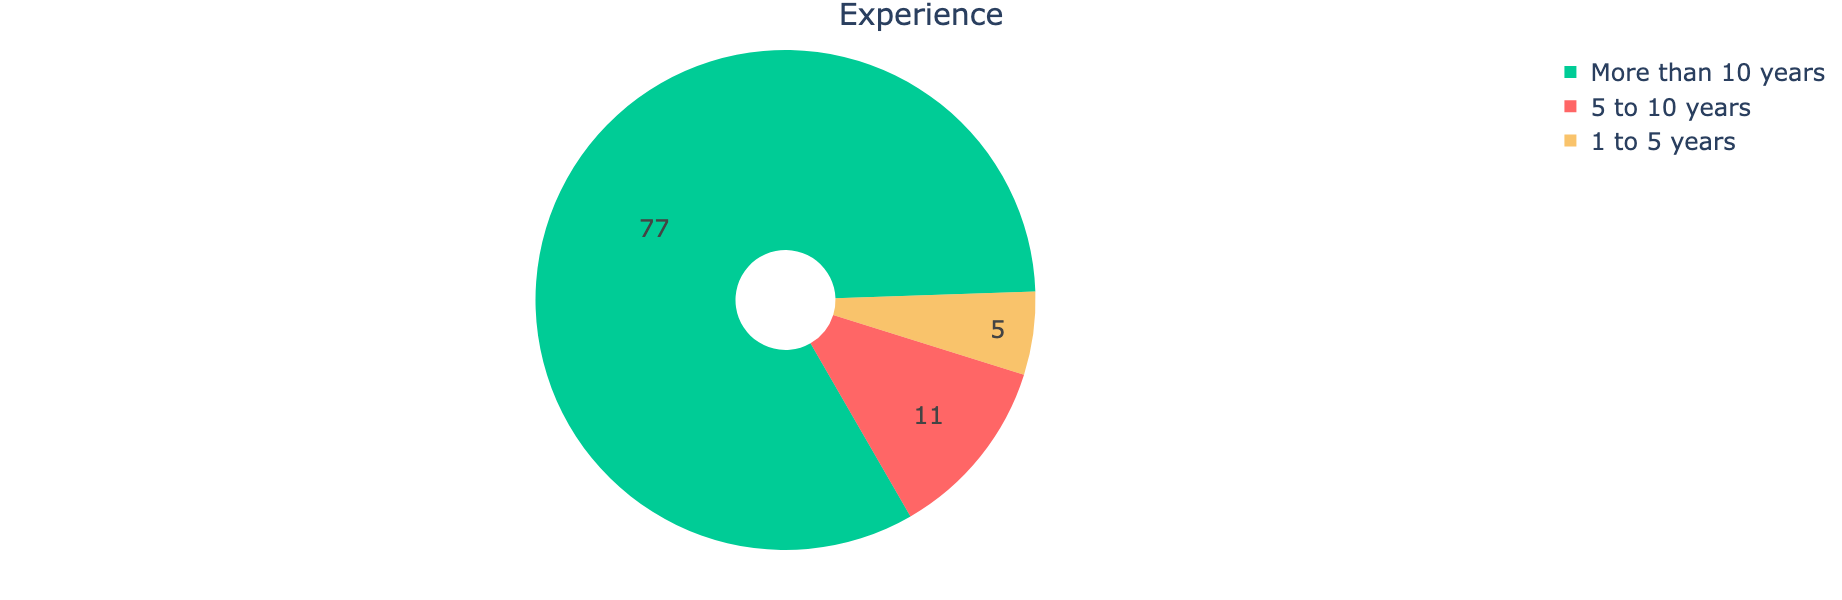

In [486]:
pie_chart_1_colors = ['rgba(0,204,150,255)', 'rgba(255, 0, 0, 0.6)', 'rgba(245, 156, 9, 0.6)']

fig = go.Figure(
    go.Pie(labels=Q10_value_counts['Value'], values=Q10_value_counts['Count'], showlegend=True, 
           textinfo='value', rotation=150, textposition='inside', hole=0.2, marker=dict(colors=pie_chart_1_colors), 
           textfont=dict(size=24))

)

fig.update_layout(
    width=800,   # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    title_text="Experience",  # Add a title to the figure
    title_x=0.5,  # Center the title horizontally
    title_font=dict(size=30),
    margin=dict(t=50, l=50, r=50, b=50)
)


fig.update_layout(
    legend=dict(
        font=dict(
            size=24  # Set the font size for legend text
        )
    )
)

fig.show()
fig.write_image("Participants_experience.png", width=800, height=600, scale=6)

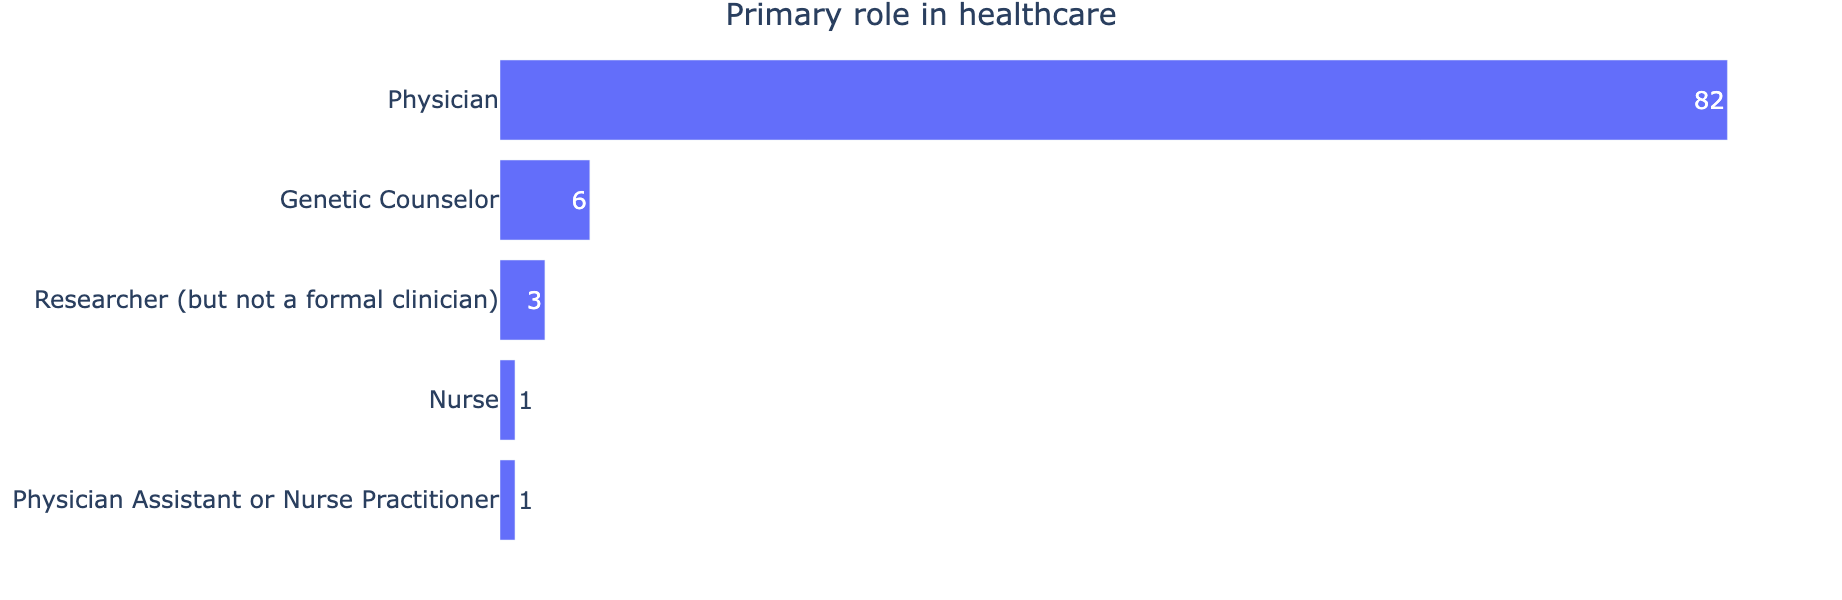

In [487]:
fig = go.Figure(
    go.Bar(x=Q4_value_counts['Count'], y=Q4_value_counts['Value'], orientation='h', showlegend=False, 
           text=Q4_value_counts['Count'], textposition='auto', textfont=dict(size=24), marker=dict(color='rgba(99,110,250,255)'))
)

bar_chart_2_order = ['Physician Assistant or Nurse Practitioner', 'Nurse','Researcher (but not a formal clinician)','Genetic Counselor','Physician']
fig.update_yaxes(categoryorder='array', categoryarray=bar_chart_2_order)



fig.update_xaxes(showgrid=True, zeroline=True, showline=True, linewidth=1, linecolor='black', mirror=False, tickfont=dict(size=24), visible=False)
fig.update_yaxes(showgrid=True, zeroline=True, showline=False, linewidth=1, linecolor='black', mirror=False, tickfont=dict(size=24))

fig.update_layout(
    width=850,   # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    title_text="Primary role in healthcare",  # Add a title to the figure
    title_x=0.5,  # Center the title horizontally
    title_font=dict(size=30),
    margin=dict(t=50, l=50, r=50, b=50)
)

fig.show()
fig.write_image("Participants_role.png", width=800, height=600, scale=6)

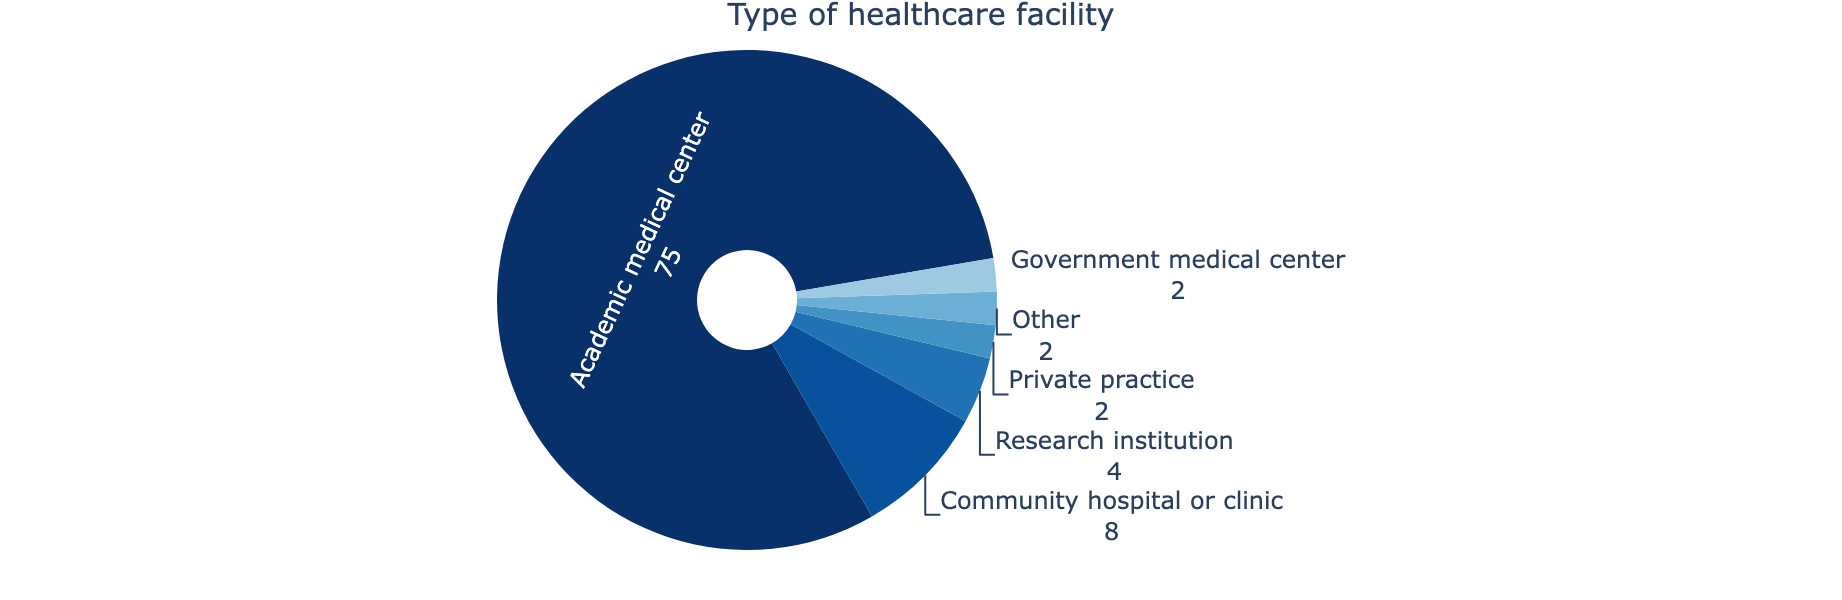

In [488]:
fig = go.Figure(
    go.Pie(labels=Q11_value_counts['Value'], values=Q11_value_counts['Count'], showlegend=False, 
           textinfo='value+label', rotation=150, textposition='auto', hole=0.2, marker=dict(colors=px.colors.sequential.Blues_r), 
           textfont=dict(size=24))

)

fig.update_layout(
    width=800,   # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    title_text="Type of healthcare facility",  # Add a title to the figure
    title_x=0.5,  # Center the title horizontally
    title_font=dict(size=30),
    margin=dict(t=50, l=50, r=50, b=50)
)


fig.update_layout(
    legend=dict(
        font=dict(
            size=18  # Set the font size for legend text
        )
    )
)

fig.show()
fig.write_image("Participants_facilities.png", width=800, height=600, scale=6)